<font size="10">  <div align="center"> FAIR - JupyterLab - practice </div> </font>  

# Interface discovery

## Connexion to jupyter-lab 

1. Go to this adress: https://hub.mesocentre.uca.fr/hpc-jupyter/hub/login

    <img src="images/jupyter_welcome.png" alt="drawing" width="1000"/>
2. Ask a jupyter session

     <img src="images/start_server.png" alt="drawing" width="1000"/>
3. Submit the job to open the session

     <img src="images/job_choice.png" alt="drawing" width="1000"/>
4. Discover your interface    
     <img src="images/jupyter_page.png" alt="drawing" width="1000"/>



## Discover toolbox

    1. From the github repository of the FAIR practice, import the jupyter session part
        - from the web interface
        - from the cluster terminal
    2. Launch the jupyter.ipynb
    3. Launch a console interface
    4. Launch a terminal interface

### Magic command a special case

Jupyter notebook has special commands : `magic commands` and `magic cells` \
The magic commands allow you to interact with your environnement to analyse the data. \
To call it, use the `%` symbol before in a `code cell` \
The list of available magic commands is available typing : `%lsmagic`
This command is available only on the line where it is write

The magic cells are cells with specific behaviour due to the magic cell command in the header of the cell \
It is use for example to use command from another language (ruby, bash, R...)

1. List the magic commands

2. List folder content using magic command

3. Make a cell with bash code

<details>
  <summary>Magic command solution</summary>
    
1. ```%lsmagic```
2. ```%ls```    
3. \
%%bash \
#On the HPC2 cluster, when starting a new session, you need to activate the conda module \
module load conda \
#list environments \
conda env list

</details>
    

# Make your own Kernel to work
Jupyter work with `kernel` as the core of your analysis. You can build your own kernel and customize it with somes tools that you need.
The main kernel are build with python or R environment but with the magic commands you can open the world !
Here we will first build a kernel to python analysis then a R kernel for statistics.


```
Follow the guide from the mesocentre to install your kernel: https://hub.mesocentre.uca.fr/docs/cluster/applis/jupyterhub/
```
1. Install a Python Kernel with python 3.10
```
conda create -n env_py3.10 python=3.10 numpy ipykernel jupyter_client
conda activate env_py3.10
python -m ipykernel install --user --name env_py3.10 --display-name "kernel_python_3.10"
```

2. Install a R kernel with r-base 4.2

```
conda create --name env-r4.2 r-base=4.2 r-essentials r-irkernel jupyter_client
conda activate env-r4.2
R -e "IRkernel::installspec(name='env-r4.2', displayname='env_R_4.2', user=TRUE)"
```

Test available kernels
```
conda activate env_py3.10
jupyter kernelspec list
```

# Work with both python and R in the same notebook

```
Jupyter also to work both with python and R in the same notebook
The simple way is to create a conda env with python and R, then install a specific library: rpy2
```
1. In the previous R 4.2 kernel install rpy2 from conda
    - use the terminal interface from jupyter
    - activate the conda env containing your R version
    - install rpy2 from conda
3. Create a new notebook file with the kernel containg R and python
4. Call the rpy2 package
`%load_ext rpy2.ipython`

5. Make a notebook with python and R cells \
`Now to call a R code into a cell use : magic variables %%R`


## Import python libraries

In [1]:
%load_ext rpy2.ipython
import os
import pandas as pd
import numpy as np
import import_ipynb

## Import R libraries

In [2]:
%%R
# load
library(ggplot2)

## Import a dataframe with python

In [3]:
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})
df.transpose()

,0,1,2,3,4,5,6,7,8,9
cups_of_coffee,0,1,2,3,4,5,6,7,8,9
productivity,2,5,6,8,9,8,0,1,0,-1


## Plot data from python with ggplot2 from R

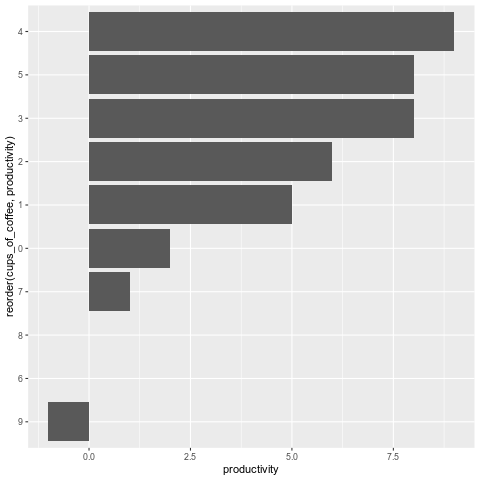

In [4]:
%%R -i df
ggplot(df, aes(x=reorder(cups_of_coffee,productivity), y=productivity)) + geom_col() + coord_flip()

# Genomic in jupyter notebook

```
You already know to build python or R kernel, but you can also consider all you analysis to be done in the notebooks.
Here we illustrate the interaction of the notebook with your environment, to analyse genomic data using current bioinformatic tools
```

## Quality assessement of a SARS-COV-2 sample
sample file is located here : https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR25109930
To download in command line :

`wget -O test_files/SRR25109930.fastq.gz https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR25109930`

 1. Using the fastQC quality check tool you will control the quality of the sars-cov2 sample SRR25109930.fastq.gz

2. Using the fastQC quality check tool you will use the job submission to analyse the sars-cov2 sample

<details>
  <summary>Quality check solution</summary>
    
1.
`fastqc test_files/SRR25109930.fastq.gz --outdir test_files`

2.
`sbatch ./test_files/fastqc.sh`

</details>
    

### Genome alignement of a SARS-COV-2 sample

1. Index the Sars-Cov2 reference genome using bwa2

2. Align raw reads data on the reference genome

3. Extract statistic of the mapping using samtools stats

<details>
  <summary>Genome alignement solutions</summary>
    
1.
`bwa-mem2 index test_files/sars_reference_genome/sequence_sarscov2.fasta`

2.
`bwa-mem2 mem test_files/sars_reference_genome/sequence_sarscov2.fasta test_files/SRR25109930.fastq.gz -o test_files/sars_alignment.sam`

3.
`samtools stats test_files/sars_alignment.sam > test_files/sars_map_stats.txt`

</details>

# Transcriptomic analysis from raw data to differential expression results
## Transcript count

1. Index raw data using kallisto
2. Estimate abundance of transcripts in the sample

<details>
  <summary>Transcriptomic analysis solutions</summary>
    
1.
`kallisto index -i "test_files/hg38_transcripts.fa" "test_files/hg38_F.fq.gz" "test_files/hg38_R.fq.gz"`

2.
`kallisto quant -i "test_files/hg38_transcripts.fa" "test_files/hg38_F.fq.gz" "test_files/hg38_R.fq.gz" -b 100 -o "test_files/kallisto_output"`

</details>

## Differential analysis of counts

In [6]:
%%R
library("DESeq2")
library("tximport")
library("readr")
library("RColorBrewer")
library("pheatmap")

R[write to console]: Le chargement a nécessité le package : S4Vectors

R[write to console]: Le chargement a nécessité le package : stats4

R[write to console]: Le chargement a nécessité le package : BiocGenerics

R[write to console]: 
Attachement du package : ‘BiocGenerics’


R[write to console]: Les objets suivants sont masqués depuis ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: Les objets suivants sont masqués depuis ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


R[write to console]: 
Attachement du package : ‘S4Vectors’


R[write to console]: Les objets suivants sont masqués depuis ‘package:bas

In [7]:
%%R
# transform data
dir <- "test_files/rna_seq_samples"
samples <- read.table(file.path(dir,"samples.tsv"), sep="\t", header=T)
files <- list.files(dir,pattern=".sf.gz",full.names=T)
names(files) <- samples$run
tx2gene <- read_csv(file.path(dir, "tx2gene.gencode.v27.csv"))
txi <- tximport(files, type="salmon", tx2gene=tx2gene)


Rows: 200401 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): TXNAME, GENEID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing length



In [8]:
%%R
# translate data as deseq2 input
ddsTxi <- DESeqDataSetFromTximport(txi,
                                   colData = samples,
                                   design = ~ condition)
dds <- DESeq(ddsTxi)
res <- results(dds)

R[write to console]: using counts and average transcript lengths from tximport

R[write to console]: estimating size factors

R[write to console]: using 'avgTxLength' from assays(dds), correcting for library size

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [9]:
%%R
df = as.data.frame(res)
head(df)

                      baseMean log2FoldChange     lfcSE        stat    pvalue
ENSG00000000003.14    7.823792     0.58263279 1.1191941  0.52058245 0.6026577
ENSG00000000005.5     0.000000             NA        NA          NA        NA
ENSG00000000419.12 1231.709864     0.03020618 0.3159912  0.09559185 0.9238447
ENSG00000000457.13  498.809533     0.23473323 0.3113314  0.75396575 0.4508698
ENSG00000000460.16  716.121634     0.29715818 0.3644427  0.81537686 0.4148566
ENSG00000000938.12 2696.996073    -0.20715975 0.3896575 -0.53164571 0.5949714
                        padj
ENSG00000000003.14 0.9998488
ENSG00000000005.5         NA
ENSG00000000419.12 0.9998488
ENSG00000000457.13 0.9998488
ENSG00000000460.16 0.9998488
ENSG00000000938.12 0.9998488


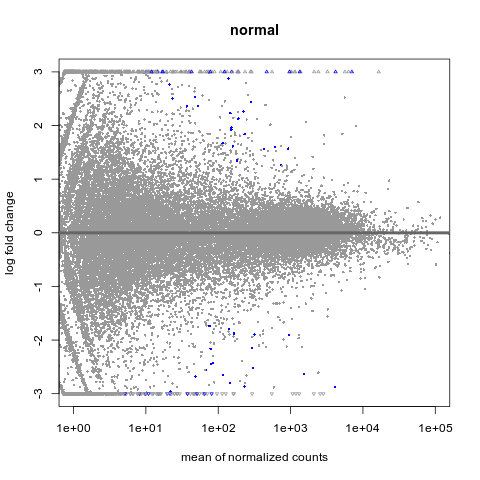

In [10]:
%%R
#Plot DE outputs
xlim <- c(1,1e5); ylim <- c(-3,3)
plotMA(res, xlim=xlim, ylim=ylim, main="normal")

In [11]:
%%R
vsd <- vst(dds, blind=FALSE)
sampleDists <- dist(t(assay(vsd)))

## Distance matrix


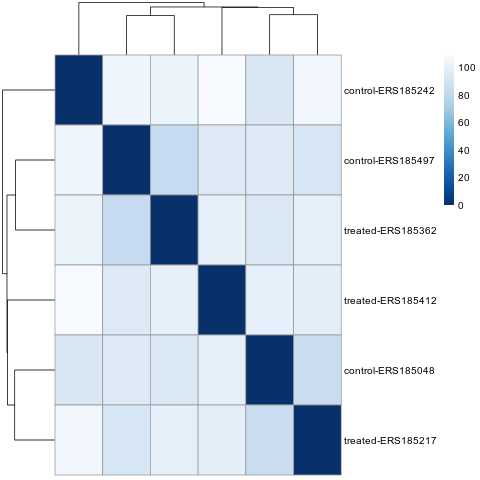

In [12]:
%%R
# Plot of sample distance
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$sample, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)


## Sample PCA

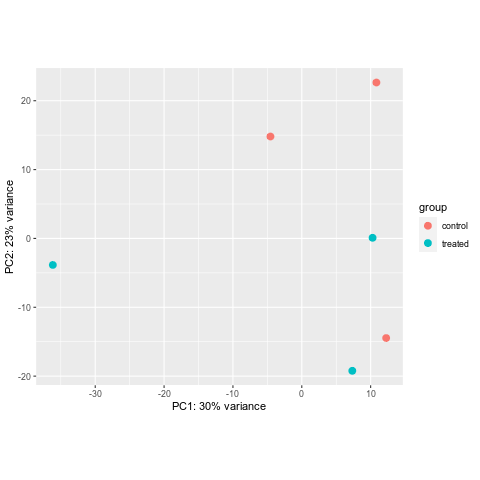

In [13]:
%%R
plotPCA(vsd, intgroup=c("condition"))